Nama   : Herwin Mardhana
# Email. : herwin.mardhana@gmail.com

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-03 16:41:54--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.33MB/s    in 86s     

2020-11-03 16:43:21 (3.57 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = '/content/output/train'
validation_dir = '/content/output/val'

In [4]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98):
      print("\Hentikan training karena akurasi diatas 0.98!")
      self.model.stop_training = True

callbacks = Callback()

In [5]:
!pip install split-folders
import splitfolders

splitfolders.ratio(base_dir, output="output", seed=1337, ratio=(.6, .4), group_prefix=None)

Copying files: 2188 files [00:00, 3289.28 files/s]


In [6]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2,
      callbacks=[callbacks])

Epoch 1/20
25/25 - 35s - loss: 0.9580 - accuracy: 0.5063 - val_loss: 0.7845 - val_accuracy: 0.6938
Epoch 2/20
25/25 - 35s - loss: 0.4931 - accuracy: 0.8050 - val_loss: 0.3594 - val_accuracy: 0.8875
Epoch 3/20
25/25 - 35s - loss: 0.3159 - accuracy: 0.9062 - val_loss: 0.2637 - val_accuracy: 0.8938
Epoch 4/20
25/25 - 35s - loss: 0.2382 - accuracy: 0.9087 - val_loss: 0.2639 - val_accuracy: 0.9062
Epoch 5/20
25/25 - 37s - loss: 0.1896 - accuracy: 0.9325 - val_loss: 0.2638 - val_accuracy: 0.9000
Epoch 6/20
25/25 - 34s - loss: 0.1608 - accuracy: 0.9413 - val_loss: 0.2467 - val_accuracy: 0.9062
Epoch 7/20
25/25 - 34s - loss: 0.1794 - accuracy: 0.9337 - val_loss: 0.1617 - val_accuracy: 0.9438
Epoch 8/20
25/25 - 34s - loss: 0.1435 - accuracy: 0.9488 - val_loss: 0.2103 - val_accuracy: 0.9187
Epoch 9/20
25/25 - 34s - loss: 0.1921 - accuracy: 0.9300 - val_loss: 0.1746 - val_accuracy: 0.9312
Epoch 10/20
25/25 - 34s - loss: 0.1567 - accuracy: 0.9450 - val_loss: 0.1284 - val_accuracy: 0.9625
Epoch 11/

Saving batu.png to batu.png
batu.png
rock


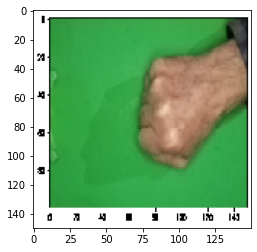

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]==1:
    print('paper')
  elif classes[0,1]==1:
    print('rock')
  else:
    print('scissors')